In [87]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
# Creating object for training set DataFrame
Train_DF = pd.read_csv('train.csv',index_col=[0])

# Displaying first 5 rows of the DataFrame
Train_DF.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [89]:
# Getting information regarding the types of data
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [90]:
# Checking if there is any empty row in particular or not
Train_DF.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5880\3554237390.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('crim','zn')


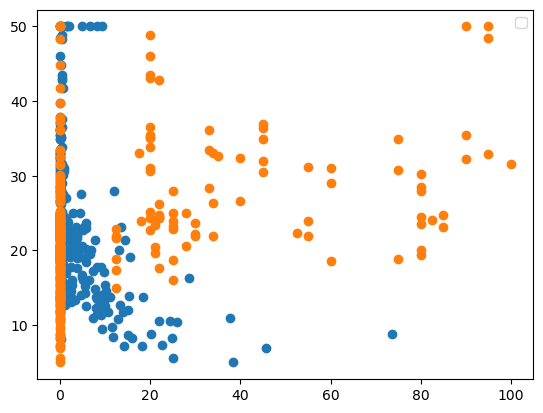

In [104]:
plt.scatter(Train_DF['crim'],Train_DF['medv'])
plt.scatter(Train_DF['zn'],Train_DF['medv'])
plt.legend('crim','zn')

In [91]:
X = Train_DF.iloc[:,0:13]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
ID,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08


In [92]:
Y = Train_DF.iloc[:,-1]
Y

ID
1      24.0
2      21.6
4      33.4
5      36.2
7      22.9
       ... 
500    17.5
502    22.4
503    20.6
504    23.9
506    11.9
Name: medv, Length: 333, dtype: float64

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=1,random_state=2)

In [94]:
LR = LinearRegression()

In [95]:
LR.fit(X_train,Y_train)

LinearRegression()

In [100]:
type(LR.coef_)

numpy.ndarray